## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

## **Loading dataset containing 281 descriptors**

In [3]:
df_final = pd.read_csv('delaney_mordred_truncated.csv')
df_final.head()

,Compound ID,SMILES,measured log(solubility:mol/L),ABC,nBase,SpMAD_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Lipinski,GhoseFilter
0,"1,1,1,2-Tetrachloroethane",ClCC(Cl)(Cl)Cl,-2.18,4.012290,0,0.969771,11.637367,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,"1,1,1-Trichloroethane",CC(Cl)(Cl)Cl,-2.00,3.464102,0,0.800000,8.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,"1,1,2,2-Tetrachloroethane",ClC(Cl)C(Cl)Cl,-1.74,3.932653,0,1.000000,11.530010,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,"1,1,2-Trichloroethane",ClCC(Cl)Cl,-1.48,3.047207,0,1.045250,8.629874,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,"1,1,2-Trichlorotrifluoroethane",FC(F)(Cl)C(F)(Cl)Cl,-3.04,5.808525,0,0.901388,17.881697,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [4]:
y = df_final['measured log(solubility:mol/L)']
X = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:, 3:]), columns = df_final.iloc[:, 3:].columns)

In [5]:
X.shape

(1144, 281)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [7]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9844489609585416
The r2 score for test set is : 0.8685959892939115


**Scikit Learn's Feature Importance Algorithm**



> In scikit-learn, the feature importance in a Random Forest regression model can be obtained through the feature_importances_ attribute. This attribute provides a relative importance score for each feature in the dataset based on how much each feature contributes to reducing the impurity (e.g., mean squared error) in the construction of the decision trees within the Random Forest.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'FilterItLogS'),
  Text(1, 0, 'Lipinski'),
  Text(2, 0, 'SIC0'),
  Text(3, 0, 'RNCG'),
  Text(4, 0, 'RPCG'),
  Text(5, 0, 'ATS0Z'),
  Text(6, 0, 'PEOE_VSA6'),
  Text(7, 0, 'AATS0i')])

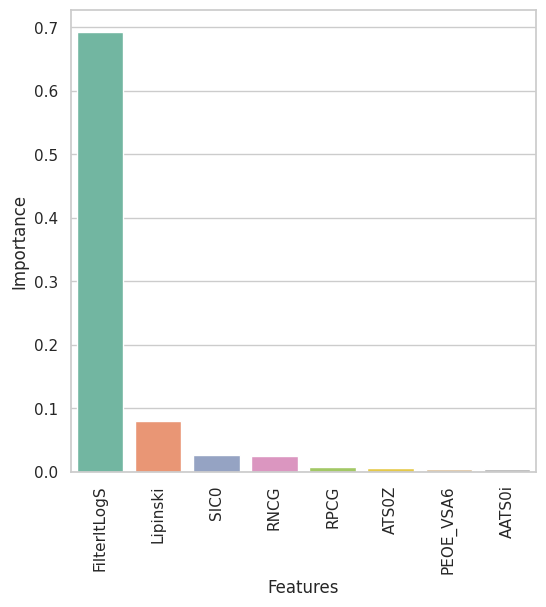

In [8]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_fi = DF_imp[:8]
plt.subplots(figsize=(6,6))
sns.barplot(data=top_desc_fi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
# plt.show()
# plt.savefig('fi.png', dpi=300, bbox_inches='tight')

In [9]:
DF_imp[:8]['Features'].values

array(['FilterItLogS', 'Lipinski', 'SIC0', 'RNCG', 'RPCG', 'ATS0Z',
       'PEOE_VSA6', 'AATS0i'], dtype=object)

In [10]:
df_final_8 = df_final[DF_imp[:8]['Features'].values]

In [13]:
df_final_8.head()

,FilterItLogS,Lipinski,SIC0,RNCG,RPCG,ATS0Z,PEOE_VSA6,AATS0i,measured log(solubility:mol/L)
0,-2.790326,1,0.500000,0.330754,0.551252,1230,34.80282,162.007716,-2.18
1,-2.129911,1,0.520426,0.311690,0.695189,942,34.80282,164.102494,-2.00
2,-2.433986,1,0.500000,0.250000,0.335426,1230,0.00000,162.007716,-1.74
3,-2.147371,1,0.520426,0.372917,0.364050,942,0.00000,164.102494,-1.48
4,-2.664600,1,0.520426,0.277752,0.533222,1182,23.20188,208.591109,-3.04


In [12]:
delaney_8_des = pd.concat([df_final_8, y], axis=1)
delaney_8_des.to_csv('delaney_8_des.csv', index=None)

In [ ]:
y = df_final['measured log(solubility:mol/L)']
X = pd.DataFrame(StandardScaler().fit_transform(df_final_8), columns = df_final_8.columns)

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9809565755465792
The r2 score for test set is : 0.8627291730070371


In [ ]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
print(f'The r2 score for train set is : {et.score(X_train, y_train)}')
print(f'The r2 score for test set is : {et.score(X_test, y_test)}')

The r2 score for train set is : 0.9993033354917727
The r2 score for test set is : 0.8596341729130056


### **Hyperparameter Tuning**

## **Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor(n_estimators=100,
                           bootstrap=True,
                           max_depth=None,
                           max_features=1.0,
                           min_samples_leaf=1,
                           min_samples_split=2,
                          )

In [ ]:
clf_rf = GridSearchCV(estimator=rf, param_grid = { 'n_estimators': [400, 600, 700, 800, 900],
                                                  'bootstrap': [True, False],
                                                  'max_depth': [30, 45, 60, 75, 100, None],
                                                  'max_features': ['log2', 'sqrt'],
                                                  'min_samples_leaf': [2, 4],
                                                  'min_samples_split': [5, 10],
                                                  }, cv=3, verbose=0, scoring='r2')


In [ ]:
start = time.time()

clf_rf.fit(X_train, y_train)

end = time.time()
# total time taken
print("Execution time of the program is- ", end-start)

Execution time of the program is-  2094.2008335590363


In [ ]:
clf_rf.cv_results_

{'mean_fit_time': array([0.88448962, 1.67600886, 3.19042778, 2.26174029, 2.17343068,
        0.82179928, 1.3989377 , 1.53539586, 1.62349558, 2.13599094,
        0.8338867 , 1.20641088, 1.71541087, 1.59342941, 2.09405764,
        0.79253682, 1.18639954, 1.58491087, 1.68727032, 2.16843001,
        0.93121521, 1.14209517, 1.32842358, 1.99379317, 1.71220414,
        0.80755854, 1.28271174, 1.25940561, 1.55802441, 1.82961782,
        0.72016875, 1.09091338, 1.53449726, 1.71405093, 1.89397033,
        0.71129878, 1.06221906, 1.2261103 , 1.72117885, 1.72140082,
        1.1692036 , 1.38850562, 1.48537445, 1.98955425, 1.94397076,
        0.84705893, 1.49389895, 1.44472933, 1.91036264, 1.8322045 ,
        0.83035103, 1.49635681, 1.41266743, 1.70202605, 2.12253801,
        0.78767308, 1.2087098 , 1.70269783, 1.59788783, 2.07546465,
        0.76441081, 1.1370186 , 1.65157318, 1.53379766, 1.86787105,
        1.27062829, 1.09985304, 1.27704565, 1.76292237, 1.63717779,
        0.73152018, 1.30650846,

In [ ]:
pd.DataFrame(clf_rf.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
43,1.989554,0.308390,0.062874,0.009762,True,45,log2,2,5,800,"{'bootstrap': True, 'max_depth': 45, 'max_feat...",0.877768,0.876577,0.874891,0.876412,0.001180,1
162,1.488117,0.009944,0.048768,0.001963,True,100,log2,2,5,700,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",0.878048,0.876561,0.874605,0.876405,0.001410,2
40,1.169204,0.171702,0.035534,0.005148,True,45,log2,2,5,400,"{'bootstrap': True, 'max_depth': 45, 'max_feat...",0.877295,0.877281,0.874604,0.876393,0.001265,3
83,2.004106,0.254795,0.061962,0.012692,True,60,log2,2,5,800,"{'bootstrap': True, 'max_depth': 60, 'max_feat...",0.878764,0.876657,0.873648,0.876356,0.002099,4
0,0.884490,0.025848,0.031401,0.001498,True,30,log2,2,5,400,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.878569,0.875580,0.874670,0.876273,0.001665,5


In [ ]:
clf_rf.best_params_

{'bootstrap': True,
 'max_depth': 45,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 45,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 800)
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9656049113324834
The r2 score for test set is : 0.8588094696222762


In [ ]:
et = ExtraTreesRegressor(bootstrap=True,
                           max_depth=None,
                           max_features=1.0,
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=100)

In [ ]:

clf_et = GridSearchCV(estimator=et, param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 30, 60, 85, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [200, 400, 600, 800, 1000,]}, cv=3, verbose=0, scoring='r2')

In [ ]:
start = time.time()
clf_et.fit(X_train, y_train)
end = time.time()
# total time taken
print("Execution time of the program is- ", end-start)

Execution time of the program is-  1210.5102186203003


In [ ]:
clf_et.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

In [ ]:
et = ExtraTreesRegressor(bootstrap= False,
 max_depth= 100,
 max_features= 'log2',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators = 800)
et.fit(X_train, y_train)
print(f'The r2 score for train set is : {et.score(X_train, y_train)}')
print(f'The r2 score for test set is : {et.score(X_test, y_test)}')

The r2 score for train set is : 0.9536176197940477
The r2 score for test set is : 0.8518787371531531


## **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf_rf_rs = RandomizedSearchCV(rf, param_distributions={'bootstrap': [True, False],
 'max_depth': [10, 30, 60, 85, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [200, 400, 600, 800, 1000,]}, n_iter=10, scoring='r2', cv=3)

In [ ]:
start = time.time()

clf_rf_rs.fit(X_train, y_train)

end = time.time()
# total time taken
print("Execution time of the program is- ", end-start)

Execution time of the program is-  31.08229947090149


In [ ]:
clf_rf_rs.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
rf = RandomForestRegressor(bootstrap= False,
 max_depth= 60,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 600)
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9876516564537758
The r2 score for test set is : 0.858921300247359
